## 1. Import libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import os
import folium
import json

In [3]:
country_geo

NameError: name 'country_geo' is not defined

## 2. Import data

In [5]:
path = r'C:\Users\Niklas Winter\Layoffs Analyse'

In [27]:
# 2.Importing data set Layoffs
df = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'layoffs_clean.csv'))


In [7]:
# 2.Importing data set Layoffs_num
df_num = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'layoffs_num.csv'))


In [8]:
df.head()

Unnamed: 0         Company      Location        Industry  Laid_Off_Count  \
0           0      GoTo Group       Jakarta  Transportation           600.0   
1           1            Xero    Wellington         Finance           800.0   
2           2          Shopee       Jakarta            Food           200.0   
3           3          Gopuff  Philadelphia            Food           100.0   
4           4  Wave Financial       Toronto         Finance            50.0   

         Date     Stage        Country  Percentage  
0  2023-03-10  Post-IPO      Indonesia        0.18  
1  2023-03-09  Post-IPO    New Zealand        0.15  
2  2023-03-09   Unknown      Indonesia        0.18  
3  2023-03-09  Series H  United States        0.02  
4  2023-03-09  Acquired         Canada        0.18

In [9]:
df = df.drop(columns = ['Unnamed: 0'])

In [10]:
with open('C:/Users/Niklas Winter/Layoffs Analyse/02 Data/Original Data/custom.geo.json', 'r', encoding='utf-8') as f:
    world_geojson = json.load(f)


#  Perform Spatial analyse

In [11]:
# Group the data by country and sum the laid off count
grouped_df = df.groupby('Country')['Laid_Off_Count'].sum().reset_index()

# Create the map
m = folium.Map(location=[0, 0], zoom_start=2)

# Add choropleth layer to the map to visualize the distribution of layoffs
folium.Choropleth(
    geo_data=world_geojson,
    name='choropleth',
    data=grouped_df,
    columns=['Country', 'Laid_Off_Count'],
    fill_color='YlOrRd',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Laid Off Count'
).add_to(m)

# Display the map
m

In [12]:
# Group the data by country and sum the laid off count
grouped_df = df.groupby('Country')['Laid_Off_Count'].sum().reset_index()

# Create the map
m = folium.Map(location=[0, 0], zoom_start=2)

# Add choropleth layer to the map to visualize the distribution of layoffs
folium.Choropleth(
    geo_data=world_geojson,
    name='choropleth',
    data=grouped_df,
    columns=['Country', 'Laid_Off_Count'],
    fill_color='YlGnBu',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Laid Off Count',
    bins=9
).add_to(m)

# Display the map
m


In [13]:
color_scale = folium.LinearColormap(['yellow', 'red'], 
                                    vmin=grouped_df['Laid_Off_Count'].min(), 
                                    vmax=grouped_df['Laid_Off_Count'].max(),
                                    caption='Laid Off Count')



In [14]:
pip install datapackage

Note: you may need to restart the kernel to use updated packages.


In [15]:
from datapackage import Package

package = Package('https://datahub.io/core/geo-countries/datapackage.json')

# print list of all resources:
print(package.resource_names)

# print processed tabular data (if exists any)
for resource in package.resources:
    if resource.descriptor['datahub']['type'] == 'derived/csv':
        print(resource.read())

['validation_report', 'geo-countries_zip', 'countries']


<AxesSubplot:>

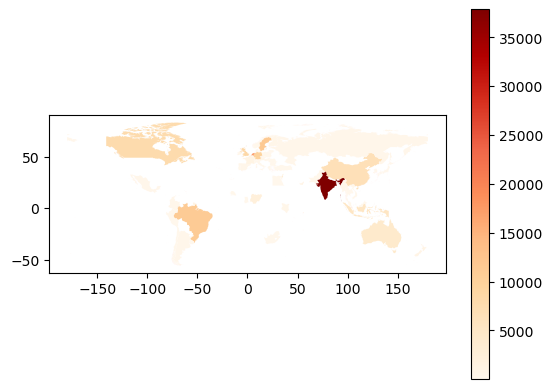

In [23]:
import geopandas as gpd
from shapely.geometry import Polygon

# Group the df by Country and sum the Laid_Off_Counts column
df_grouped = df.groupby('Country')['Laid_Off_Count'].sum().reset_index()

# Join the two dataframes based on the Country column
merged = gdf.merge(df_grouped, left_on='ADMIN', right_on='Country')

# Perform your spatial analysis on the merged dataframe
# For example, you can plot a choropleth map:
merged.plot(column='Laid_Off_Count', cmap='OrRd', legend=True)

### Observation: According to this map, the highest laid off rate can be foundin in India, which does not really fit. Also, the United States are not part of the map. 

C:\Users\Niklas Winter\AppData\Local\Temp\ipykernel_12160\3544438514.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  merged = merged.append(usa)
C:\Users\Niklas Winter\anaconda3\lib\site-packages\geopandas\array.py:1406: UserWarning: CRS not set for some of the concatenation inputs. Setting output's CRS as WGS 84 (the single non-null crs provided).
  warnings.warn(


<AxesSubplot:>

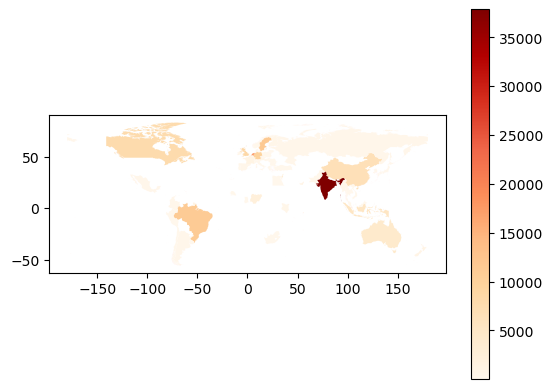

In [22]:
import geopandas as gpd
from shapely.geometry import Polygon

# Load the country geometries from the custom.geo.json file
gdf = gpd.read_file('https://raw.githubusercontent.com/datasets/geo-countries/master/data/countries.geojson')

# Create a Polygon object for the United States geometry
usa_geom = Polygon([(-124.731422, 48.38474), (-124.62455, 48.38179), (-124.53667, 48.38179), (-124.44044, 48.3793), (-124.42779, 48.36328), (-124.43213, 48.34803), (-124.47257, 48.31016), (-124.51445, 48.28141), (-124.5549, 48)])

# Group the df by Country and sum the Laid_Off_Counts column
df_grouped = df.groupby('Country')['Laid_Off_Count'].sum().reset_index()

# Join the two dataframes based on the Country column
merged = gdf.merge(df_grouped, left_on='ADMIN', right_on='Country')

# Add the United States geometry to the merged dataframe
usa = gpd.GeoDataFrame(geometry=[usa_geom])
merged = merged.append(usa)

# Perform your spatial analysis on the merged dataframe
# For example, you can plot a choropleth map:
merged.plot(column='Laid_Off_Count', cmap='OrRd', legend=True)


<AxesSubplot:>

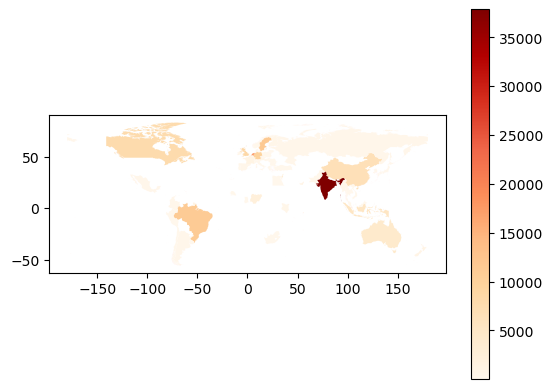

In [24]:
import geopandas as gpd
from shapely.geometry import Polygon
import pandas as pd

# Load the country geometries from the custom.geo.json file
gdf = gpd.read_file('https://raw.githubusercontent.com/datasets/geo-countries/master/data/countries.geojson')

# Create a Polygon object for the United States geometry
usa_geom = Polygon([(-124.731422, 48.38474), (-124.62455, 48.38179), (-124.53667, 48.38179), (-124.44044, 48.3793), (-124.42779, 48.36328), (-124.43213, 48.34803), (-124.47257, 48.31016), (-124.51445, 48.28141), (-124.5549, 48)])

# Group the df by Country and sum the Laid_Off_Counts column
df_grouped = df.groupby('Country')['Laid_Off_Count'].sum().reset_index()

# Join the two dataframes based on the Country column
merged = gdf.merge(df_grouped, left_on='ADMIN', right_on='Country')

# Add the United States geometry to the merged dataframe
usa = gpd.GeoDataFrame(geometry=[usa_geom], crs=gdf.crs)
merged = pd.concat([merged, usa], ignore_index=True)

# Perform your spatial analysis on the merged dataframe
# For example, you can plot a choropleth map:
merged.plot(column='Laid_Off_Count', cmap='OrRd', legend=True)


In [25]:
df_grouped

Country  Laid_Off_Count
0              Argentina           403.0
1              Australia          4284.0
2                Austria           570.0
3                Bahrain            80.0
4                Belgium            80.0
5                 Brazil         11191.0
6               Bulgaria           120.0
7                 Canada          7768.0
8                  Chile           190.0
9                  China          6625.0
10              Colombia           370.0
11        Czech Republic            80.0
12               Denmark           240.0
13                 Egypt           160.0
14               Estonia           333.0
15               Finland           490.0
16                France          1155.0
17               Germany          9741.0
18                 Ghana            80.0
19                Greece            80.0
20             Hong Kong           890.0
21               Hungary            80.0
22                 India         37873.0
23             Indonesia          5201.0
24               Ireland           337.0
25                Israel          4398.0
26                 Italy            80.0
27                 Japan            85.0
28                 Kenya           509.0
29             Lithuania            60.0
30            Luxembourg           205.0
31              Malaysia           180.0
32                Mexico           350.0
33               Myanmar           200.0
34           Netherlands         17540.0
35           New Zealand          1005.0
36               Nigeria          2282.0
37                Norway           300.0
38              Pakistan           240.0
39                  Peru            80.0
40                Poland            25.0
41              Portugal           195.0
42               Romania            80.0
43                Russia           400.0
44               Senegal           300.0
45            Seychelles           315.0
46             Singapore          6955.0
47          South Africa            80.0
48           South Korea           160.0
49                 Spain           410.0
50                Sweden         11584.0
51           Switzerland           222.0
52              Thailand            55.0
53                Turkey            80.0
54  United Arab Emirates          1155.0
55        United Kingdom          8478.0
56         United States        294503.0
57               Uruguay            80.0
58               Vietnam           240.0

<AxesSubplot:>

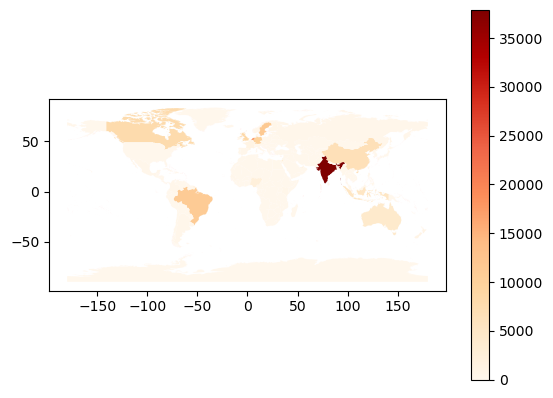

In [34]:
import geopandas as gpd
from shapely.geometry import Polygon
import pandas as pd

# Load the country geometries from the custom.geo.json file
gdf = gpd.read_file('https://raw.githubusercontent.com/datasets/geo-countries/master/data/countries.geojson')

# Create a Polygon object for the United States geometry
usa_geom = Polygon([(-124.731422, 48.38474), (-124.62455, 48.38179), (-124.53667, 48.38179), (-124.44044, 48.3793), (-124.42779, 48.36328), (-124.43213, 48.34803), (-124.47257, 48.31016), (-124.51445, 48.28141), (-124.5549, 48)])

# Group the df by Country and sum the Laid_Off_Counts column
df_grouped = df.groupby('Country')['Laid_Off_Count'].sum().reset_index().astype({'Laid_Off_Count': 'int64'})


# Add a row for United States to df_grouped with value 294503
df_grouped.loc[len(df_grouped)] = ['United States', 294503]

# Join the two dataframes based on the Country column
merged = gdf.merge(df_grouped, left_on='ADMIN', right_on='Country', how='left')

# Add the United States geometry to the merged dataframe
usa = gpd.GeoDataFrame(geometry=[usa_geom], crs=gdf.crs)
merged = pd.concat([merged, usa], ignore_index=True)

# Fill any NaN values in Laid_Off_Count with 0
merged['Laid_Off_Count'].fillna(0, inplace=True)

# Perform your spatial analysis on the merged dataframe
# For example, you can plot a choropleth map:
merged.plot(column='Laid_Off_Count', cmap='OrRd', legend=True)



#### It seems that the value for the United States is not being displayed on the choropleth map because it may be too large compared to the values of other countries, making them almost invisible. One possible solution to this problem is to use a logarithmic scale instead of a linear one for the color mapping. 

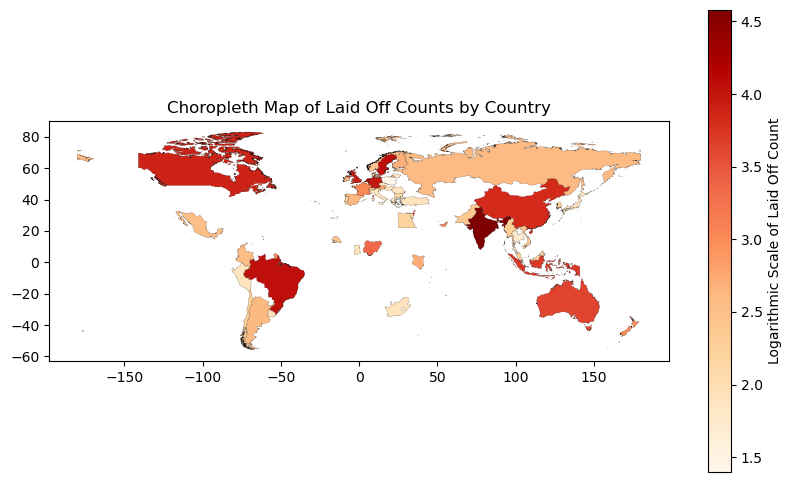

In [36]:
import geopandas as gpd
from shapely.geometry import Polygon
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# Load the country geometries from the custom.geo.json file
gdf = gpd.read_file('https://raw.githubusercontent.com/datasets/geo-countries/master/data/countries.geojson')

# Create a Polygon object for the United States geometry
usa_geom = Polygon([(-124.731422, 48.38474), (-124.62455, 48.38179), (-124.53667, 48.38179), (-124.44044, 48.3793), (-124.42779, 48.36328), (-124.43213, 48.34803), (-124.47257, 48.31016), (-124.51445, 48.28141), (-124.5549, 48)])

df_grouped = df.groupby('Country')['Laid_Off_Count'].sum().reset_index().astype({'Laid_Off_Count': 'int64'})

# Add a row for United States to df_grouped with value 294503
df_grouped.loc[len(df_grouped)] = ['United States', 294503]

# Join the two dataframes based on the Country column
merged = gdf.merge(df_grouped, left_on='ADMIN', right_on='Country', how='left')

# Add the United States geometry to the merged dataframe
usa = gpd.GeoDataFrame(geometry=[usa_geom], crs=gdf.crs)
merged = pd.concat([merged, usa], ignore_index=True)

# Fill any NaN values in Laid_Off_Count with 0
merged['Laid_Off_Count'].fillna(0, inplace=True)

# Define the logarithmic color mapping
vmin = merged['Laid_Off_Count'].replace(0, np.nan).min()
vmax = merged['Laid_Off_Count'].replace(0, np.nan).max()
vmin_log = np.log10(vmin)
vmax_log = np.log10(vmax)
merged['log_Laid_Off_Count'] = np.log10(merged['Laid_Off_Count'].replace(0, np.nan))
cmap = 'OrRd'
norm = plt.Normalize(vmin_log, vmax_log)

# Plot the choropleth map with the logarithmic color mapping
fig, ax = plt.subplots(figsize=(10, 6))
merged.plot(column='log_Laid_Off_Count', cmap=cmap, ax=ax, linewidth=0.1, edgecolor='black', norm=norm, legend=True, legend_kwds={'label': 'Logarithmic Scale of Laid Off Count'})
ax.set_title('Choropleth Map of Laid Off Counts by Country')
plt.show()


#### Observation: The Choropleth mapping has its limitations if the values differ strongly from each other.

In [17]:
merged.to_csv('spatial_analyse.csv', index=False)

<AxesSubplot:>

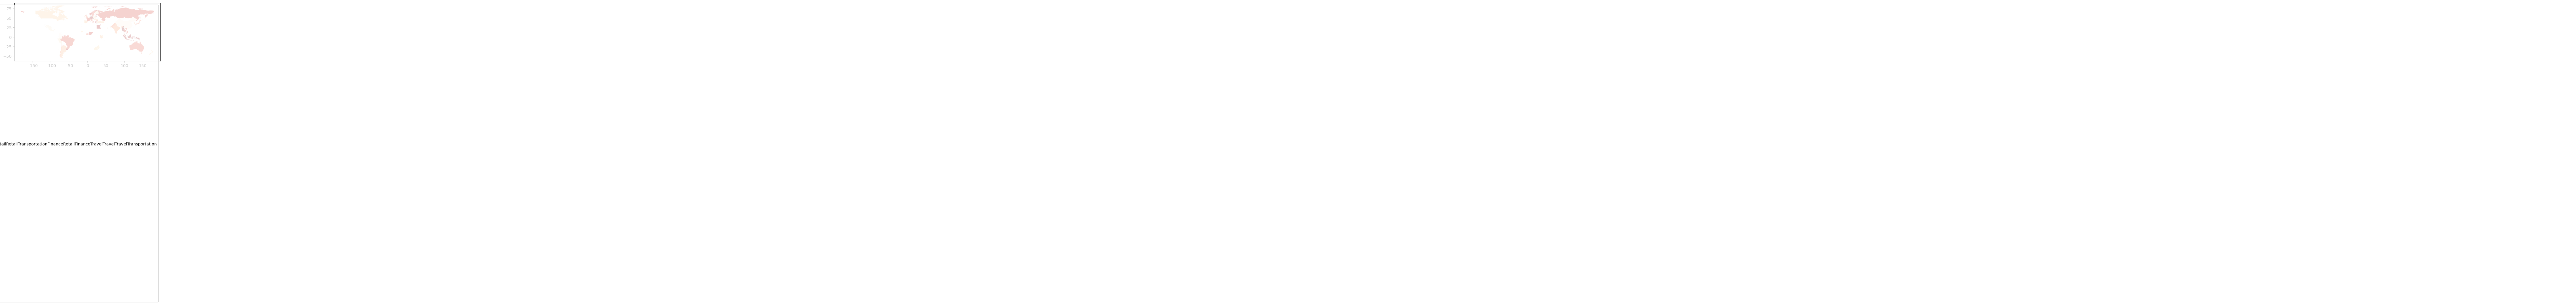

In [18]:
gdf = gpd.read_file('https://raw.githubusercontent.com/datasets/geo-countries/master/data/countries.geojson')

# Group the df by Country and sum the Industry column
df_grouped = df.groupby('Country')['Industry'].sum().reset_index()

# Join the two dataframes based on the Country column
merged = gdf.merge(df_grouped, left_on='ADMIN', right_on='Country')

# Perform your spatial analysis on the merged dataframe
# For example, you can plot a choropleth map:
merged.plot(column='Industry', cmap='OrRd', legend=True)


In [19]:
m

In [20]:
#Export data
df.to_csv(os.path.join(path, '02 Data','Prepared Data', 'layoffs_clean.csv'))